In [23]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver

In [14]:
from langgraph.graph.message import add_messages

class ChatState(TypedDict):
    
    messages : Annotated[list[BaseMessage], add_messages]
    

In [15]:
llm = ChatOpenAI()

def chat_node(state: ChatState):
    
    # take user query from state
    messages = state['messages']
    
    # send to llm 
    response=llm.invoke(messages)
    
    # response store to state
    return {'messages' : [response]}
    

In [24]:
checkpointer = MemorySaver()

graph = StateGraph(ChatState)

# Add nodes
graph.add_node("chat_node", chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot=graph.compile(checkpointer=checkpointer)


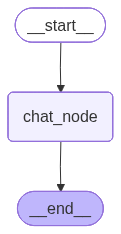

In [17]:
chatbot

In [20]:
initial_state = {
    'messages' : [HumanMessage(content='What is the capital of india')]
}

chatbot.invoke(initial_state)['messages'][-1].content

'The capital of India is New Delhi.'

In [25]:
thread_id = '1'

while True:
    user_message=input('Type Here')
    print("User: ", user_message)
    
    if user_message.strip().lower() in ["exit", "q", "quit", "bye"]:
        break
    
    config = {'configurable': {'thread_id': thread_id}}
    response = chatbot.invoke({'messages': [HumanMessage(content=user_message)]}, config=config)
    print("AI:", response['messages'][-1].content)

User:  hi my name is akash
AI: Hello Akash, it's nice to meet you. How can I assist you today?
User:  what is meaning of my name in sanskrit
AI: In Sanskrit, the name Akash means "sky" or "space". It carries connotations of vastness, openness, and boundlessness. It is a beautiful and meaningful name with a deep spiritual significance.
User:  can you add 15 in 868
AI: Sure! The answer to adding 15 to 868 is 883.
User:  then multiply with biggest prime number ever found
AI: The largest prime number that has been discovered so far is 2^82,589,933 - 1, which is a Mersenne prime number. When you multiply 883 by this prime number:

883 x 2^82,589,933 - 1 = a very large number

Unfortunately, the number is too large to display or calculate accurately in this platform.
User:  bye


In [26]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='hi my name is akash', additional_kwargs={}, response_metadata={}, id='3dabf9ab-66ad-4ad5-bd62-865f5eb1ae70'), AIMessage(content="Hello Akash, it's nice to meet you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 13, 'total_tokens': 31, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CJvbiRMxxLCSoMk9kJwT0MjyEdFlo', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--b94c65fa-09e2-4583-9dbd-742902706940-0', usage_metadata={'input_tokens': 13, 'output_tokens': 18, 'total_tokens': 31, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 're